## Diplomado "Técnicas Estadísticas y Minería de Datos"
### Módulo ll. Técnicas Estadísticas
---
Hecho por: Karol Jacqueline Nolasco Reyes

# Estimadores y sus propiedades
---
Un estimador es una función o regla matemática que se utiliza para inferir el valor de un parámetro desconocido de una población, basándose en datos muestrales. Por ejemplo, para estimar la media de una población, se puede utilizar la media muestral como estimador.

**Media Muestral (Estimador de la media poblacional)**

La media muestral se utiliza para estimar la media de una población:
$$\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} X_i$$
Donde:

$\hat{\mu}$: Estimador de la media.

$𝑋_𝑖$: Los valores individuales de la muestra.

𝑛: El tamaño de la muestra.

**Varianza Muestral (Estimador de la varianza poblacional)**

El estimador insesgado de la varianza poblacional está dado por:
$$\hat{\sigma}^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2$$
Donde:

$𝜎^2$: Estimador de la varianza.

𝑋: La media muestral.

𝑛: Tamaño de la muestra.

**Propiedades:**

Los estimadores tienen propiedades que los hacen útiles y confiables. Algunas de las más importantes son:

1. **Insesgadez:** Un estimador es insesgado si su valor esperado coincide con el parámetro que está estimando. Esto significa que, en promedio, el estimador no sobreestima ni subestima el parámetro.

  Un estimador $\hat{𝜃}$ es insesgado si cumple:
$$𝐸[\hat{𝜃}]=𝜃$$

  Donde $𝐸[\hat{𝜃}]$ es el valor esperado del estimador y 𝜃 es el parámetro poblacional verdadero.

2. **Consistencia:** Un estimador es consistente si, a medida que el tamaño de la muestra aumenta, el estimador converge al valor real del parámetro.

  Un estimador $\hat{𝜃}_𝑛$ es consistente si:
  $$\lim_{n \to \infty} P\left( \left| \hat{\theta}_n - \theta \right| < \epsilon \right) = 1, \quad \text{para todo } \epsilon > 0$$

3. **Eficiencia:** Un estimador es eficiente si tiene la menor varianza entre todos los estimadores insesgados disponibles. Esto implica que produce estimaciones más precisas.

  La eficiencia de un estimador $\hat{𝜃}$ se evalúa comparando su varianza con la varianza mínima teórica (Cramer-Rao lower bound):
  $$\text{Var}(\hat{\theta}) \geq \frac{1}{I(\theta)}$$
  Donde 𝐼(𝜃) es la información de Fisher. Un estimador eficiente alcanza la igualdad en esta desigualdad.

4. **Suficiencia:** Un estimador es suficiente si contiene toda la información sobre el parámetro que se puede obtener de los datos muestrales.

  Un estadístico 𝑇(𝑋) es suficiente para el parámetro 𝜃 si la función de verosimilitud condicional cumple:
  $$𝑃(𝑋∣𝑇(𝑋))\text{ no depende de 𝜃}$$
  
  En términos prácticos, esto significa que 𝑇(𝑋) contiene toda la información sobre 𝜃 que está disponible en la muestra 𝑋.

5. **Robustez:** Un estimador es robusto si es resistente a anomalías o desviaciones en los datos.

## **Métodos de desarrollo de estimadores**
---
Los estimadores se desarrollan mediante técnicas estadísticas como:

**Método de Máxima Verosimilitud (MLE):** Utiliza la función de verosimilitud para encontrar el valor que maximiza la probabilidad de los datos observados.

El MLE encuentra el parámetro que maximiza la función de verosimilitud 𝐿(𝜃):
$$\hat{\theta} = \arg\max_{\theta} L(\theta)$$

La función de verosimilitud depende de la distribución de los datos. Por ejemplo, para una población con distribución normal, la función de verosimilitud es:
$$L(\mu, \sigma) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(X_i - \mu)^2}{2\sigma^2}}$$

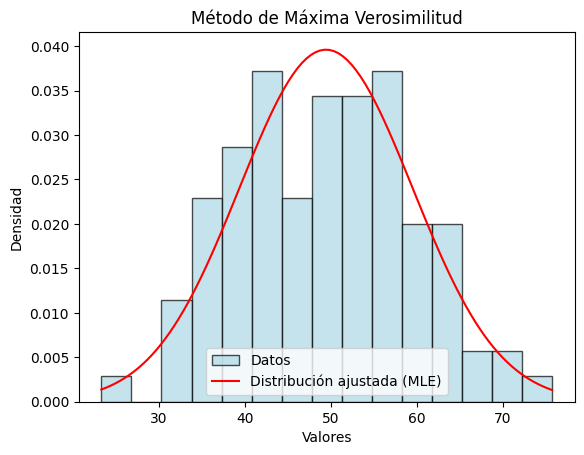

In [3]:
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Generamos datos muestrales
datos = np.random.normal(loc=50, scale=10, size=100)

# Función de log-verosimilitud
def log_verosimilitud(params):
    mu, sigma = params
    return -np.sum(norm.logpdf(datos, loc=mu, scale=sigma))

# Estimación de los parámetros
resultado = minimize(log_verosimilitud, x0=[50, 10], method="L-BFGS-B")
mu_est, sigma_est = resultado.x

# Graficamos los datos y la distribución ajustada
x = np.linspace(min(datos), max(datos), 100)
ajuste = norm.pdf(x, loc=mu_est, scale=sigma_est)

plt.hist(datos, bins=15, density=True, color='lightblue', edgecolor='black', alpha=0.7, label="Datos")
plt.plot(x, ajuste, color='red', label=f'Distribución ajustada (MLE)')
plt.title("Método de Máxima Verosimilitud")
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.legend()
plt.show()


**Método de los Momentos:** Se basa en igualar los momentos de la muestra a los momentos teóricos de la población.

Este método iguala los momentos muestrales con los momentos poblacionales teóricos. Por ejemplo:

Primer momento (media): $$ \hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} X_i $$

Segundo momento (varianza): $$ \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (X_i - \hat{\mu})^2 $$

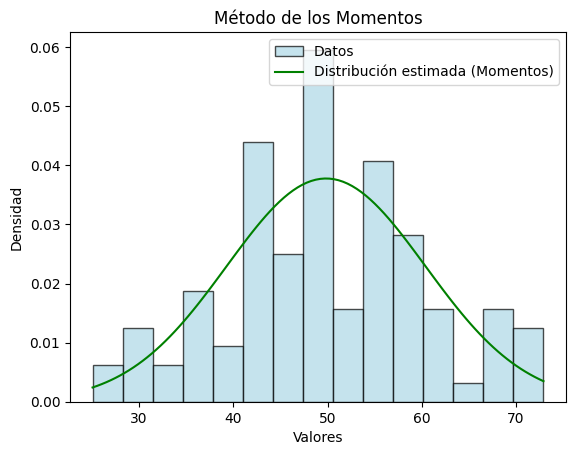

In [4]:
# Generamos datos muestrales
datos = np.random.normal(loc=50, scale=10, size=100)

# Momento muestral (media y varianza)
momento1_muestra = np.mean(datos)
momento2_muestra = np.var(datos)

# Estimamos los parámetros
mu_est = momento1_muestra
sigma_est = np.sqrt(momento2_muestra)

# Graficamos los datos y la distribución estimada
x = np.linspace(min(datos), max(datos), 100)
ajuste = norm.pdf(x, loc=mu_est, scale=sigma_est)

plt.hist(datos, bins=15, density=True, color='lightblue', edgecolor='black', alpha=0.7, label="Datos")
plt.plot(x, ajuste, color='green', label=f'Distribución estimada (Momentos)')
plt.title("Método de los Momentos")
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.legend()
plt.show()


**Bayesianismo:** Combina datos muestrales con información previa para calcular estimaciones mediante la probabilidad condicional.

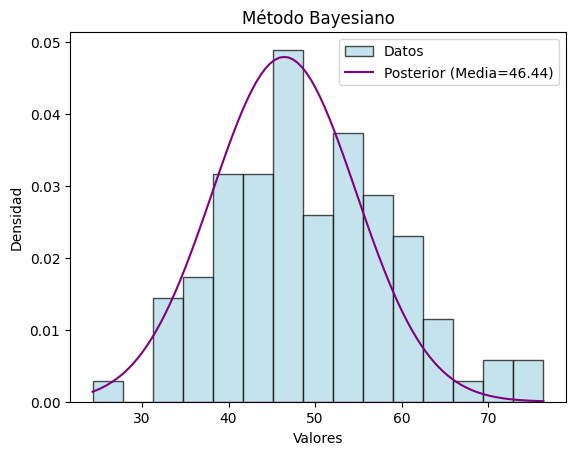

In [5]:
from scipy.stats import norm

# Datos y priors
datos = np.random.normal(loc=50, scale=10, size=100)
prior_mu = 40
prior_sigma = 15

# Posterior
posterior_mu = (np.mean(datos) / (10**2) + prior_mu / (prior_sigma**2)) / (1 / (10**2) + 1 / (prior_sigma**2))
posterior_sigma = np.sqrt(1 / (1 / (10**2) + 1 / (prior_sigma**2)))

# Graficamos los datos y la distribución posterior
x = np.linspace(min(datos), max(datos), 100)
ajuste = norm.pdf(x, loc=posterior_mu, scale=posterior_sigma)

plt.hist(datos, bins=15, density=True, color='lightblue', edgecolor='black', alpha=0.7, label="Datos")
plt.plot(x, ajuste, color='purple', label=f'Posterior (Media={posterior_mu:.2f})')
plt.title("Método Bayesiano")
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.legend()
plt.show()


# Intervalos de confianza
---
Un intervalo de confianza es un rango de valores dentro del cual se espera que se encuentre un parámetro poblacional desconocido con una probabilidad determinada, conocida como el nivel de confianza. Este concepto es fundamental en estadística inferencial, ya que permite realizar afirmaciones sobre la población basándose en datos muestrales.

**Definición del nivel de confianza $(1−𝛼)$:**

El nivel de confianza es la probabilidad de que el intervalo de confianza contenga el parámetro verdadero de la población. Valores comúnmente utilizados son 95% (𝛼=0.05) o 99% (𝛼=0.01).

**Cálculo del error estándar (𝑆𝐸):**

El error estándar mide la variabilidad de la estimación muestral y se calcula como: $$SE = \frac{\sigma}{\sqrt{n}},$$ donde 𝜎 es la desviación estándar y 𝑛 el tamaño de la muestra.

**Identificación del valor crítico (𝑍 o 𝑡):**

El valor crítico depende de la distribución del estadístico. Si el tamaño de la muestra es grande (𝑛>30) y la desviación estándar poblacional es conocida, se utiliza el valor 𝑍 de la distribución normal. En caso contrario, se utiliza el valor 𝑡 de la distribución 𝑡-Student, que considera los grados de libertad (𝑑𝑓=𝑛−1).

**Construcción del intervalo:**

El intervalo de confianza se determina utilizando la fórmula: $$IC = \overline{x} \pm (Z \cdot SE),$$ donde 𝑥‾ es la media muestral, 𝑍 el valor crítico y 𝑆𝐸 el error estándar.

**Interpretación:**

Por ejemplo, si se calcula un intervalo de confianza al 95% para una media poblacional y el resultado es [100, 120], esto significa que, bajo las condiciones del modelo, se tiene un 95% de confianza de que la verdadera media poblacional se encuentra entre estos valores.

### Ejemplos

**IC para la media poblacional ${\mu}$**

Se recolectó una muestra aleatoria de 40 observaciones para estimar la media poblacional (𝜇) de una población cuya distribución se asume normal. La muestra tiene una media de aproximadamente 50 y una desviación estándar de aproximadamente 10. Determine el intervalo de confianza del 95% para la media poblacional y visualice la distribución normal basada en los datos junto con los límites del intervalo.

IC del 95.0%: [44.86, 50.77]


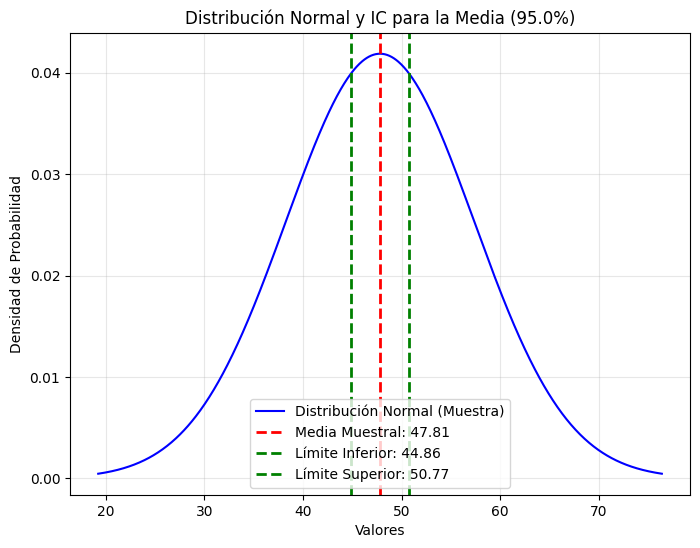

In [19]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Datos simulados (puedes sustituirlos por tus datos reales)
np.random.seed(42)
muestra = np.random.normal(loc=50, scale=10, size=40)  # Media 50, desviación estándar 10, tamaño de muestra 40

# Cálculo de parámetros de la muestra
media_muestral = np.mean(muestra)
desviacion_estandar_muestral = np.std(muestra, ddof=1)
n = len(muestra)

# Nivel de confianza y cálculo del margen de error
nivel_de_confianza = 0.95
z_critico = stats.norm.ppf((1 + nivel_de_confianza) / 2)  # Valor crítico z
margen_error = z_critico * (desviacion_estandar_muestral / np.sqrt(n))

# Intervalo de confianza
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error

print(f"IC del {nivel_de_confianza*100:.1f}%: [{limite_inferior:.2f}, {limite_superior:.2f}]")

# Gráfica de la distribución normal
x_vals = np.linspace(media_muestral - 3 * desviacion_estandar_muestral, media_muestral + 3 * desviacion_estandar_muestral, 1000)
y_vals = stats.norm.pdf(x_vals, loc=media_muestral, scale=desviacion_estandar_muestral)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, color='blue', label='Distribución Normal (Muestra)')
plt.axvline(media_muestral, color='red', linestyle='dashed', linewidth=2, label=f'Media Muestral: {media_muestral:.2f}')
plt.axvline(limite_inferior, color='green', linestyle='dashed', linewidth=2, label=f'Límite Inferior: {limite_inferior:.2f}')
plt.axvline(limite_superior, color='green', linestyle='dashed', linewidth=2, label=f'Límite Superior: {limite_superior:.2f}')
plt.title(f'Distribución Normal y IC para la Media ({nivel_de_confianza*100:.1f}%)')
plt.xlabel('Valores')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


**IC para la proporción poblacional $p$**

En una encuesta realizada en una población, se desea determinar la proporción de personas que prefieren un cierto producto frente a su competencia. De una muestra aleatoria de 200 individuos, 120 respondieron afirmativamente. Con un nivel de confianza del 95%, calcule el intervalo de confianza para la proporción poblacional
𝑝
. Además, visualice la distribución de la proporción y los límites del intervalo de confianza.

IC del 95.0%: [0.532, 0.668]


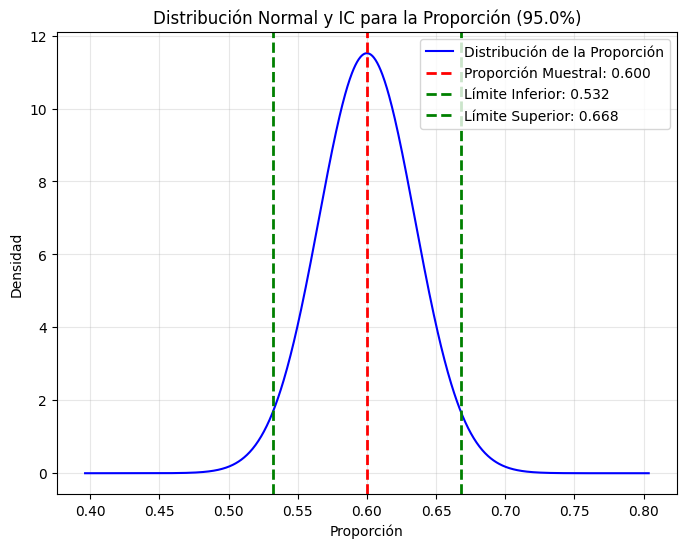

In [18]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Datos simulados
n = 200  # Tamaño de la muestra
x = 120  # Número de éxitos
nivel_de_confianza = 0.95  # Nivel de confianza

# Proporción muestral
p_muestral = x / n

# Calcular el margen de error
z_critico = stats.norm.ppf((1 + nivel_de_confianza) / 2)  # Valor crítico z
margen_error = z_critico * np.sqrt((p_muestral * (1 - p_muestral)) / n)

# Intervalo de confianza
limite_inferior = p_muestral - margen_error
limite_superior = p_muestral + margen_error

print(f"IC del {nivel_de_confianza*100:.1f}%: [{limite_inferior:.3f}, {limite_superior:.3f}]")

# Gráfica de la distribución normal
x_vals = np.linspace(p_muestral - 3 * margen_error, p_muestral + 3 * margen_error, 1000)
y_vals = stats.norm.pdf(x_vals, loc=p_muestral, scale=np.sqrt((p_muestral * (1 - p_muestral)) / n))

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, color='blue', label='Distribución de la Proporción')
plt.axvline(p_muestral, color='red', linestyle='dashed', linewidth=2, label=f'Proporción Muestral: {p_muestral:.3f}')
plt.axvline(limite_inferior, color='green', linestyle='dashed', linewidth=2, label=f'Límite Inferior: {limite_inferior:.3f}')
plt.axvline(limite_superior, color='green', linestyle='dashed', linewidth=2, label=f'Límite Superior: {limite_superior:.3f}')
plt.title(f'Distribución Normal y IC para la Proporción ({nivel_de_confianza*100:.1f}%)')
plt.xlabel('Proporción')
plt.ylabel('Densidad')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
#